## **About Dataset**
This [dataset](https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure/data) contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

### **Dataset Information**


A detailed description of the dataset can be found in the Dataset section of the following paper:

**Title:**
Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone

**Authors:**

Davide Chicco
Giuseppe Jurman

**Source:**
BMC Medical Informatics and Decision Making 20, 16 (2020)

**DOI:**
https://doi.org/10.1186/s12911-020-1023-5
.

### **Dataset Details**


| Feature                | Explanation                                         | Measurement     | Range                 |
|------------------------|-----------------------------------------------------|-----------------|-----------------------|
| Age                    | Age of the patient                                  | Years           | [40, …, 95]           |
| Anaemia                | Decrease of red blood cells or hemoglobin           | Boolean         | 0, 1                  |
| High blood pressure    | If a patient has hypertension                      | Boolean         | 0, 1                  |
| Creatinine phosphokinase (CPK) | Level of the CPK enzyme in the blood         | mcg/L           | [23, …, 7861]         |
| Diabetes               | If the patient has diabetes                        | Boolean         | 0, 1                  |
| Ejection fraction      | Percentage of blood leaving the heart at each contraction | Percentage | [14, …, 80]           |
| Sex                    | Woman or man                                       | Binary          | 0, 1                  |
| Platelets              | Platelets in the blood                              | kiloplatelets/mL| [25.01, …, 850.00]    |
| Serum creatinine       | Level of creatinine in the blood                    | mg/dL           | [0.50, …, 9.40]       |
| Serum sodium           | Level of sodium in the blood                        | mEq/L           | [114, …, 148]         |
| Smoking                | If the patient smokes                              | Boolean         | 0, 1                  |
| Time                   | Follow-up period                                   | Days            | [4, …, 285]           |
| Death event (target)   | If the patient died during the follow-up period    | Boolean         | 0, 1                  |


<br>


### **Deep dive into the dataset**

#### **Dataset Overview:**

- Medical records of 299 heart failure patients collected at Faisalabad Institute of Cardiology and Allied Hospital in Faisalabad, Punjab, Pakistan, during April–December 2015.
- Patients had left ventricular systolic dysfunction and were classified as NYHA classes III or IV.
- Consisted of 105 women and 194 men, aged between 40 and 95 years old.

#### **Features:**

- 13 features including clinical, body, and lifestyle information.
- Binary features: anaemia, high blood pressure, diabetes, sex, and smoking.
- Anaemia defined as haematocrit levels lower than 36%.
- Definition of high blood pressure not provided in the dataset.
- Creatinine phosphokinase (CPK) indicates the level of CPK enzyme in blood, possibly indicating heart failure or injury with high levels.
- Ejection fraction measures the percentage of blood pumped out by the left ventricle with each contraction.
- Serum creatinine indicates kidney function; high levels may suggest renal dysfunction.
- Serum sodium test checks sodium levels in the blood, abnormal levels may indicate heart failure.
- Death event feature used as target in binary classification study, indicating if the patient died or survived during the follow-up period (130 days on average).

#### **Dataset Characteristics:**

- Dataset represented as a table with 299 rows (patients) and 13 columns (features).
- Imbalance in the dataset with 203 survived patients and 96 dead patients.
- Survival rate: 67.89% negatives (survived), 32.11% positives (died).
- Further details and changes to feature names available in the original dataset curator's publication.

## Preparing the tools

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Model for Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

### Load Data

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.shape

(299, 13)

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Check for any missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
#Choose a style for the plot
plt.style.use("seaborn-v0_8-whitegrid")

# Define a function to plot the selected feature
def plot_feature(feature):
    plt.figure(figsize=(11,6))
    df[feature].hist(bins=20, color='royalblue', edgecolor='black')
    plt.title(f'Distribution of {feature}',fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Frequency');

# Create a dropdown widget with the dataframe's column names
dropdown = widgets.Dropdown(options=df.columns, description='Feature:')

# Use the interact function to create the widget and the plot
widgets.interact(plot_feature, feature=dropdown);

interactive(children=(Dropdown(description='Feature:', options=('age', 'anaemia', 'creatinine_phosphokinase', …

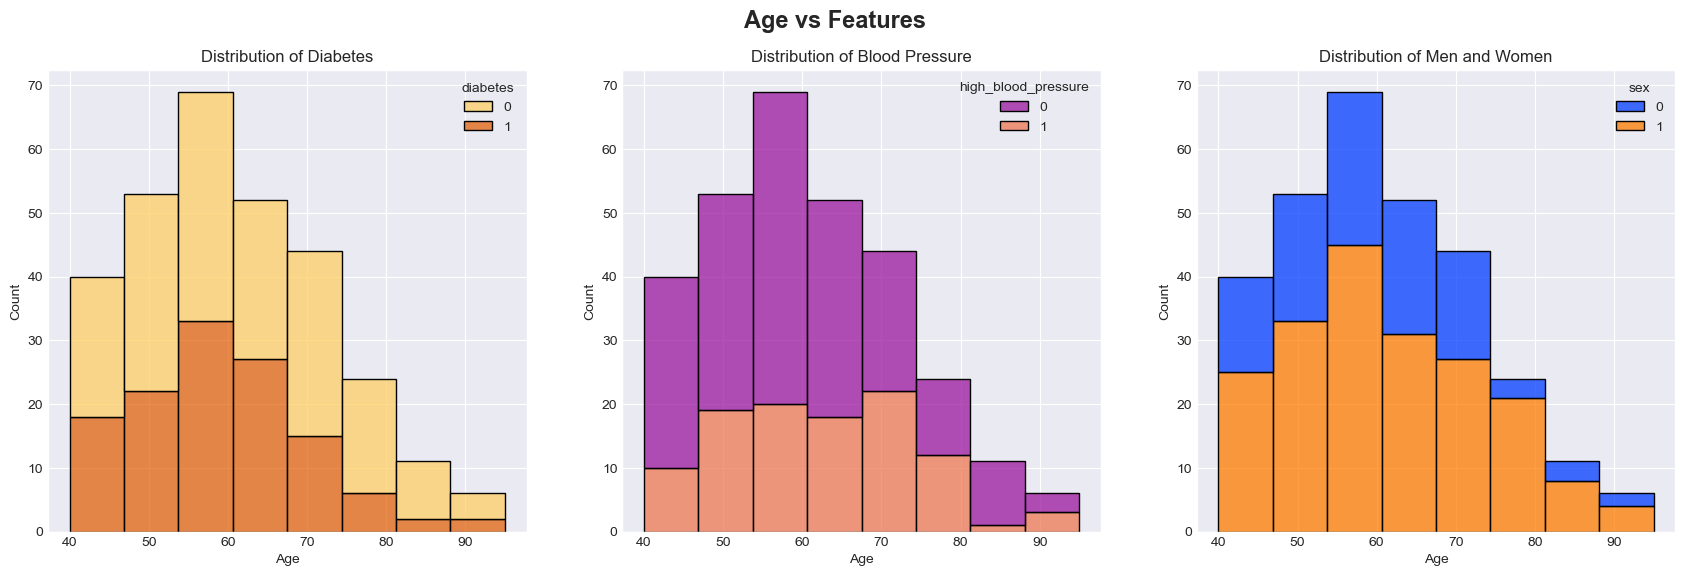

In [8]:
#Choose a style for the plot
sns.set_style('darkgrid')

# Create a figure and axes with 1 row and 3 columns
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

# Plot the distribution of diabetics
sns.histplot(data=df, x='age', bins=8, hue='diabetes', palette='YlOrBr', multiple='stack', edgecolor='black', ax=ax[0])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Diabetes')

# Plot the distribution of high blood pressure
sns.histplot(data=df, x='age', bins=8, hue='high_blood_pressure', palette='plasma', multiple='stack', edgecolor='black', ax=ax[1])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Blood Pressure')

# Plot the distribution of men/women
sns.histplot(data=df, x='age', bins=8, hue='sex', palette='bright', multiple='stack', edgecolor='black', ax=ax[2])
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Count')
ax[2].set_title('Distribution of Men and Women');

fig.suptitle("Age vs Features", fontsize=17, fontweight="bold");

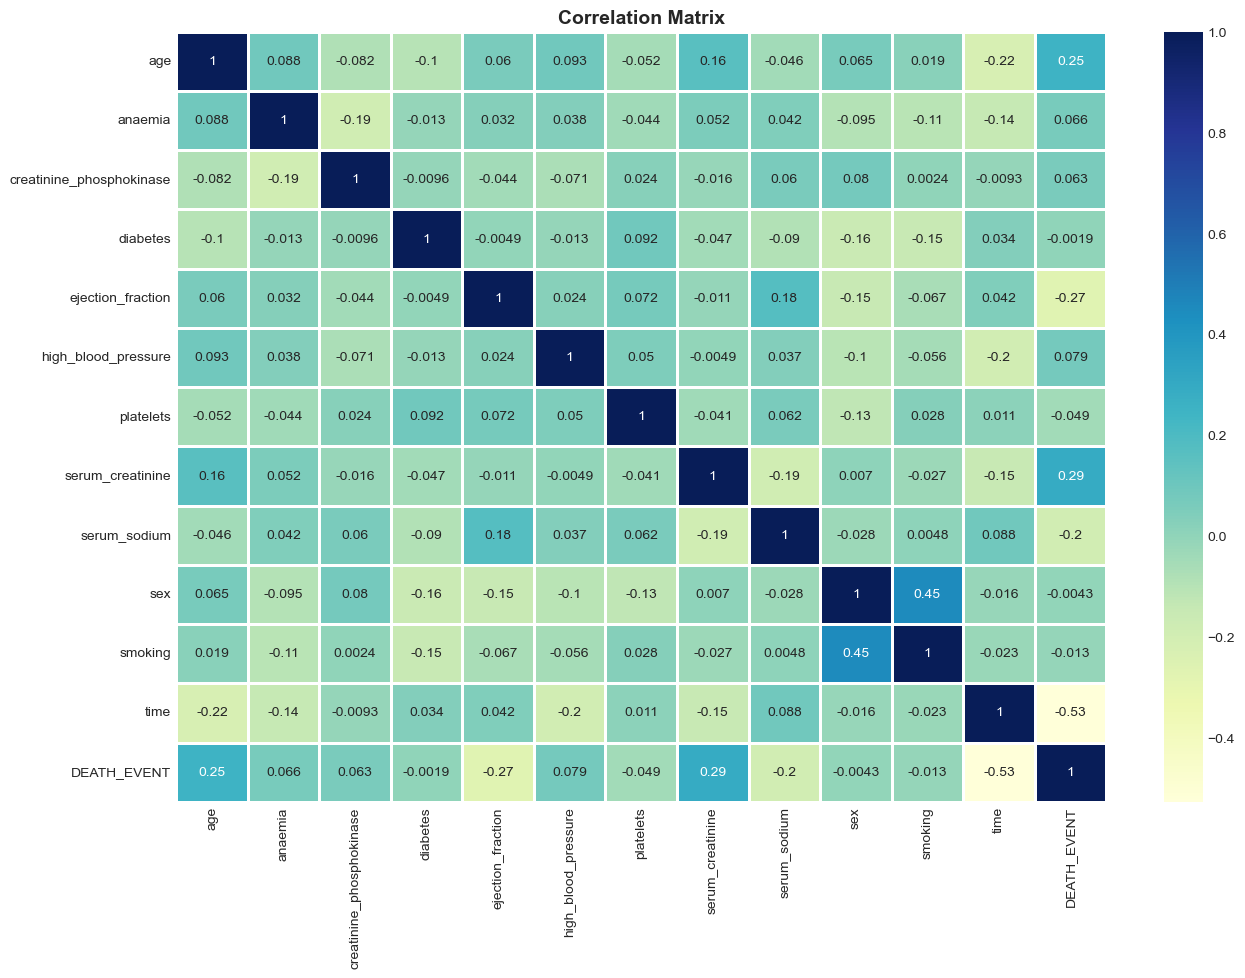

In [9]:
# Making our correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=1,
                 cmap="YlGnBu");
plt.title('Correlation Matrix',fontsize=14, fontweight="bold");

## Machine Learning

In [10]:
# Spliting data into X and y
X = df.drop("DEATH_EVENT",axis=1)
y = df["DEATH_EVENT"]

In [11]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [12]:
# Spliting data into train and test sets
np.random.seed(50)

# Split data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Comparing Different Models

In [13]:
## Create a function to evaluate the models
def evaluate_preds(y_true, y_preds):
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [14]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Extra-Trees": ExtraTreesClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

In [15]:
# Put evaluation metrics in a dictionary
metrics = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1': f1_score}

In [16]:
# Iterate over each classifier
for name, model in models.items():
            # Setup random seed
            np.random.seed(50)
    
            # Evaluate the best model
            model.fit(X_train, y_train)
            y_preds = model.predict(X_test)

            # Calculate evaluation metrics
            model_scores = {}
            for metric, func in metrics.items():
                model_scores[metric] = func(y_test, y_preds)

            # Print evaluation metrics
            print(f"\nClassifier: {name}")
            for metric, value in model_scores.items():
                if metric in ['accuracy']:
                    print(f"{metric.capitalize()}: {value * 100:.2f}%")
                else:
                    print(f"{metric.capitalize()}: {value:.2f}")


Classifier: Logistic Regression
Accuracy: 81.67%
Precision: 0.78
Recall: 0.67
F1: 0.72

Classifier: Random Forest
Accuracy: 86.67%
Precision: 0.93
Recall: 0.67
F1: 0.78

Classifier: K-Nearest Neighbors
Accuracy: 65.00%
Precision: 0.50
Recall: 0.29
F1: 0.36

Classifier: Extra-Trees
Accuracy: 78.33%
Precision: 0.75
Recall: 0.57
F1: 0.65

Classifier: Decision Tree
Accuracy: 80.00%
Precision: 0.70
Recall: 0.76
F1: 0.73

Classifier: Naive Bayes
Accuracy: 76.67%
Precision: 0.77
Recall: 0.48
F1: 0.59


Looks like `Logistic Regression` and `Random Forest` are the best performing models, so let's try to tune their hyperparameters using **`GridSearchCV`**

### Hyperparameter tuning with GridSearchCV

In [17]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"max_depth": [5, 8, None], 
             "max_features": [3, 5, 7], 
             "min_samples_split": [2, 5, 8, 15, 20], 
             "n_estimators": [100, 200, 500]}

# Setup random seed
np.random.seed(50)

# Setup GridSearchCV for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(), 
                           param_grid=rf_grid,
                           cv=5,
                           verbose=True,
                           n_jobs = -1)

# Fit GridSearchCV for RandomForestClassifier()
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, None], 'max_features': [3, 5, 7],
                         'min_samples_split': [2, 5, 8, 15, 20],
                         'n_estimators': [100, 200, 500]},
             verbose=True)

In [18]:
y_preds = gs_rf.predict(X_test)
evaluate_preds(y_test,y_preds);

Accuracy: 90.00%
Precision: 0.94
Recall: 0.76
F1 score: 0.84


In [19]:
# Create a hyperparameter grid for LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup random seed
np.random.seed(50)

# Setup GridSearchCV for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit GridSearchCV for LogisticRegression
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [20]:
y_preds = gs_log_reg.predict(X_test)
evaluate_preds(y_test,y_preds);

Accuracy: 81.67%
Precision: 0.81
Recall: 0.62
F1 score: 0.70


In [21]:
# Setup random seed
np.random.seed(50)

rf = RandomForestClassifier()
rf_optimized = rf.set_params(**gs_rf.best_params_).fit(X_train, y_train)

y_preds = rf_optimized.predict(X_test)
evaluate_preds(y_test,y_preds);

Accuracy: 90.00%
Precision: 0.94
Recall: 0.76
F1 score: 0.84


Let's analyze our **`Random Forest Classifier`** using `Corss-Validation` and examine its `Confusion Matrix` and `ROC Curve`.

#### 10-Fold Cross Validation Metrics

In [22]:
cv_results = cross_validate(rf_optimized, X_train, y_train, cv = 10, scoring = ["accuracy", "f1", "recall", "precision"])

In [23]:
for metric, values in cv_results.items():
                if metric in ["test_accuracy"]:
                    print(f"Accuracy: {values.mean() * 100:.2f}%")
                elif metric in ["test_f1"]:
                    print(f"F1: {values.mean():.2f}")
                elif metric in ["test_precision"]:
                    print(f"Precision: {values.mean():.2f}")
                elif metric in ["test_recall"]:
                    print(f"recall: {values.mean():.2f}")

Accuracy: 86.21%
F1: 0.75
recall: 0.69
Precision: 0.86


#### Confusion Matrix and ROC curve

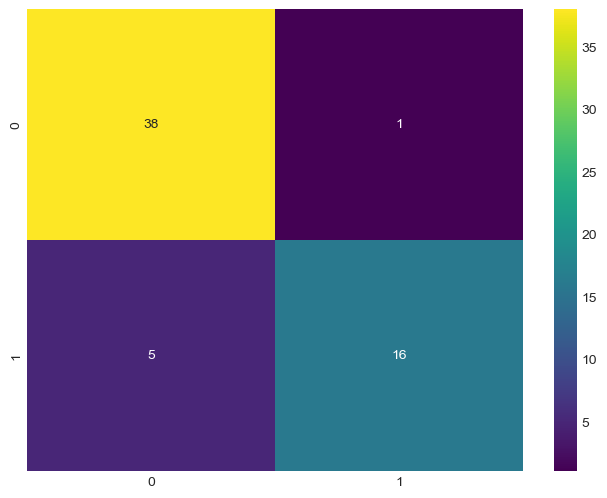

In [24]:
# Making a Confusion Matrix
y_preds = rf_optimized.predict(X_test)

ConfusionMatrix = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(ConfusionMatrix, cmap="viridis", annot=True);

In [25]:
# Create a function for plotting ROC curves
def plot_roc_curve(fpr, tpr):
    # Plot roc curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_probs_positive), color='blue')
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

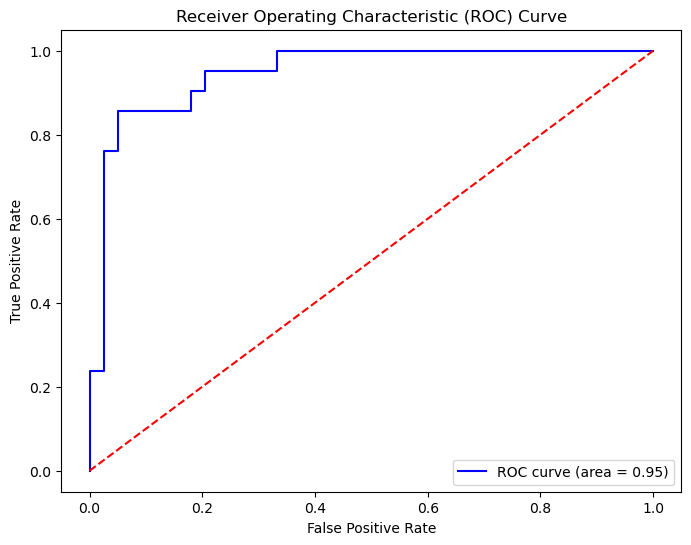

In [26]:
#Choose a style for the plot
plt.style.use("default")

# Make predictions with probabilities
y_probs = rf_optimized.predict_proba(X_test)

# Caculate fpr, tpr and thresholds
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
    
plot_roc_curve(fpr, tpr)

### Feature Importance

Finally lets see which features contributed most to the model.

In [27]:
# view the feature scores
feature_scores = pd.Series(rf_optimized.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

time                        0.447735
ejection_fraction           0.163605
serum_creatinine            0.130701
age                         0.074748
serum_sodium                0.067313
creatinine_phosphokinase    0.048962
platelets                   0.044845
high_blood_pressure         0.006615
anaemia                     0.004889
smoking                     0.004289
sex                         0.003809
diabetes                    0.002490
dtype: float64

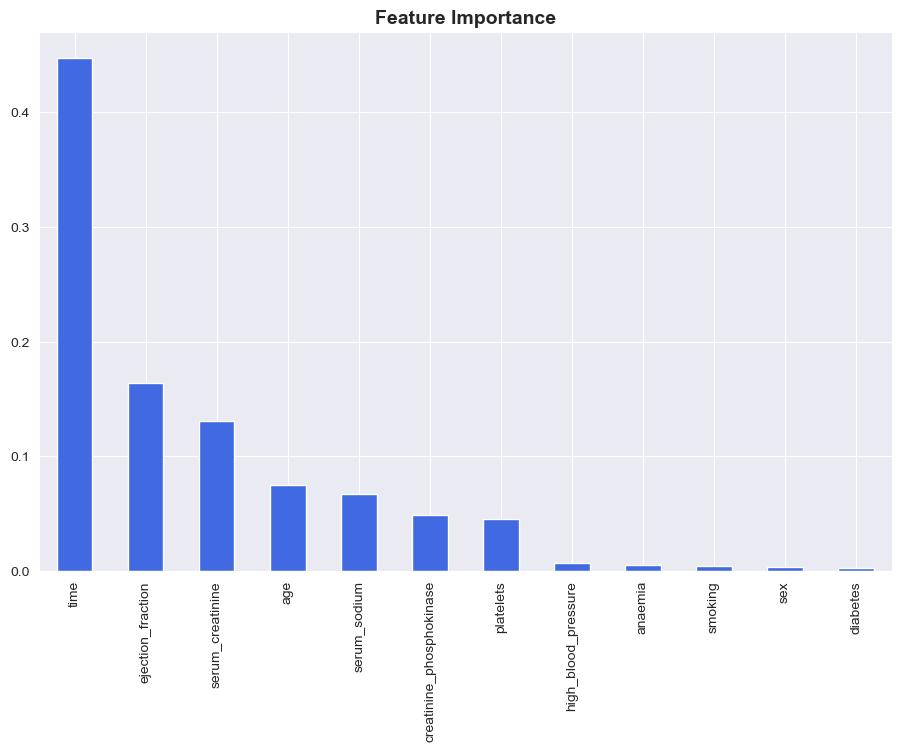

In [28]:
#Choose a style for the plot
sns.set_style('darkgrid')

# Visualize feature importance
plt.figure(figsize=(11, 7))
plt.title("Feature Importance", fontsize=14, fontweight="bold")
feature_scores.T.plot.bar(legend=False, color='royalblue');

It appears that `time` contributes significantly to the model when compared to other features, however it is clear that `time` cannot be the only significant feature.